In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
context = pd.read_csv("context.csv")
interactions = pd.read_csv("interactions.csv")
products = pd.read_csv("products.csv")
reviews = pd.read_csv("reviews.csv")
users = pd.read_csv("users.csv")

In [2]:
print("\n=== Context Summary ===")
print(context['location'].value_counts())
print(context['device'].value_counts())
print(context['time_of_day'].value_counts())

print("\n=== Interactions Summary ===")
print(interactions['interaction_type'].value_counts())

print("\n=== Product Categories and Brands ===")
print(products['category'].value_counts())
print(products['brand'].value_counts().head(10))

print("\n=== Reviews Rating Distribution ===")
print(reviews['rating'].value_counts().sort_index())

print("\n=== User Demographics ===")
print(users['location'].value_counts())
print(users['gender'].value_counts())
print(users['age'].describe())


=== Context Summary ===
location
Bangalore    1088
Hyderabad    1073
Chennai      1070
Mumbai        955
Delhi         814
Name: count, dtype: int64
device
Mobile     2955
Desktop    1527
Tablet      518
Name: count, dtype: int64
time_of_day
Evening      1288
Night        1280
Afternoon    1217
Morning      1215
Name: count, dtype: int64

=== Interactions Summary ===
interaction_type
view           3025
add_to_cart    1474
purchase        501
Name: count, dtype: int64

=== Product Categories and Brands ===
category
Electronics       81
Books             80
Home & Kitchen    76
Sports            73
Beauty            72
Toys              65
Clothing          53
Name: count, dtype: int64
brand
Tata Motors       81
Penguin India     80
Nivia             73
Funskool          65
Godrej Interio    59
Himalaya          56
FabIndia          41
Crompton          17
Mamaearth         16
Pantaloons        12
Name: count, dtype: int64

=== Reviews Rating Distribution ===
rating
1    407
2    429
3

In [3]:
interactions['interaction_id'] = interactions.index
merged = interactions.merge(context, on='interaction_id', suffixes=('', '_context'))
merged = merged.merge(users, on='user_id', suffixes=('', '_user'))

# Analyze interactions by location
location_distribution = merged.groupby("location")["interaction_type"].value_counts(normalize=True).unstack().fillna(0)
print("\n=== Interaction Type Distribution by Location (Normalized) ===")
print(location_distribution.round(3))


=== Interaction Type Distribution by Location (Normalized) ===
interaction_type  add_to_cart  purchase   view
location                                      
Bangalore               0.294     0.105  0.601
Chennai                 0.294     0.106  0.600
Delhi                   0.290     0.114  0.596
Hyderabad               0.304     0.083  0.613
Mumbai                  0.290     0.095  0.615


<Figure size 1000x600 with 0 Axes>

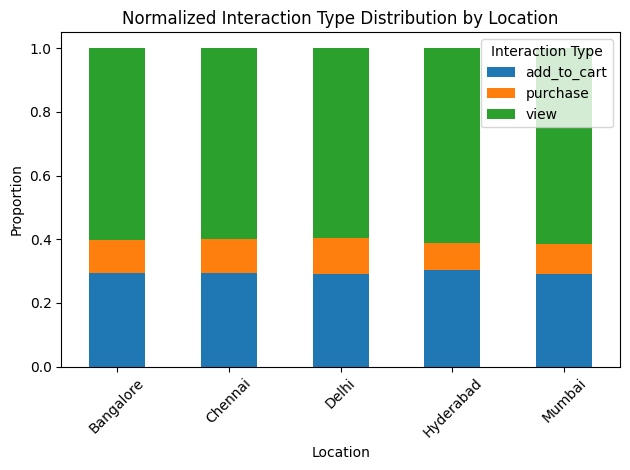

In [4]:


plt.figure(figsize=(10, 6))
location_distribution.plot(kind='bar', stacked=True)
plt.title("Normalized Interaction Type Distribution by Location")
plt.ylabel("Proportion")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Interaction Type")
plt.show()



=== Product Categories ===
category
Electronics       81
Books             80
Home & Kitchen    76
Sports            73
Beauty            72
Toys              65
Clothing          53
Name: count, dtype: int64


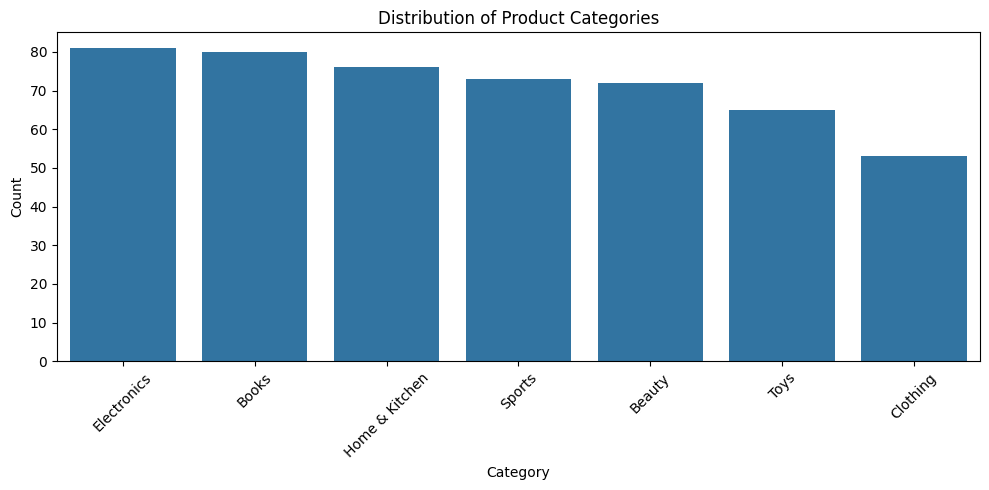


=== User Locations ===
location
Chennai      223
Bangalore    211
Hyderabad    206
Mumbai       192
Delhi        168
Name: count, dtype: int64


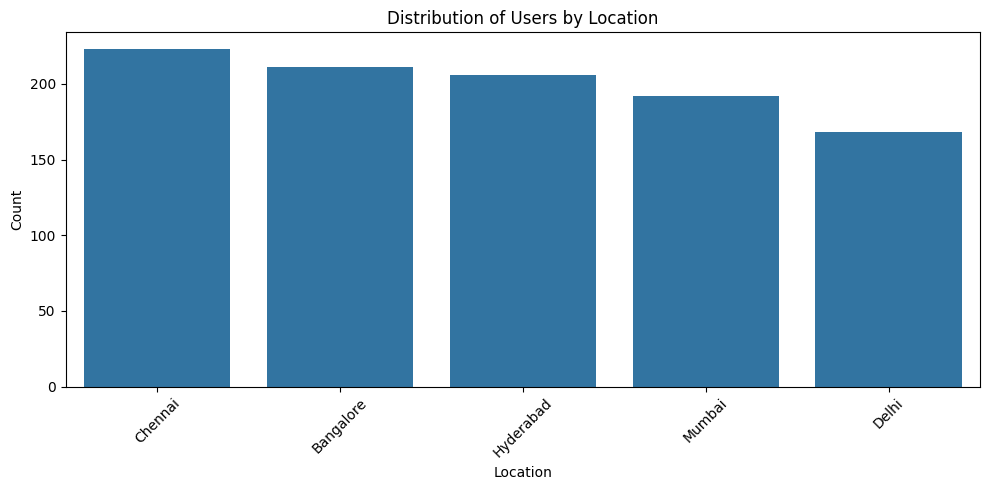

In [5]:
# --- Additional EDA for Product Categories ---
print("\n=== Product Categories ===")
category_counts = products['category'].value_counts()
print(category_counts)

plt.figure(figsize=(10, 5))
sns.countplot(data=products, x='category', order=category_counts.index)
plt.title("Distribution of Product Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Additional EDA for User Locations ---
print("\n=== User Locations ===")
location_counts = users['location'].value_counts()
print(location_counts)

plt.figure(figsize=(10, 5))
sns.countplot(data=users, x='location', order=location_counts.index)
plt.title("Distribution of Users by Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


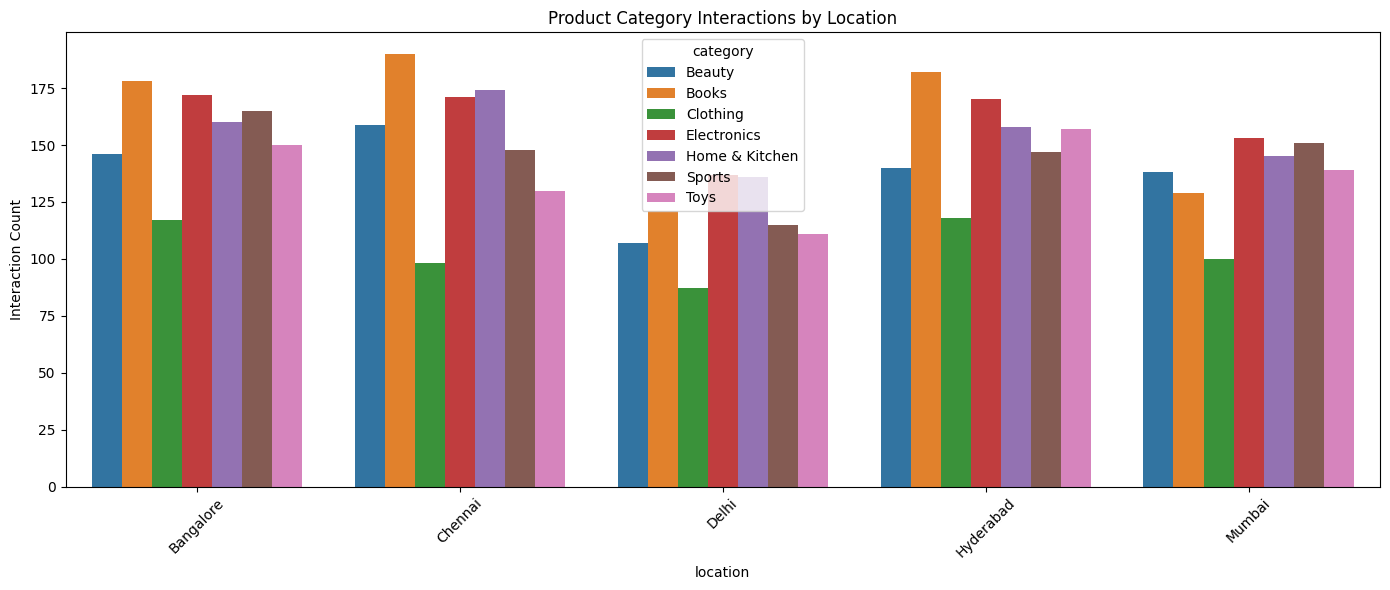

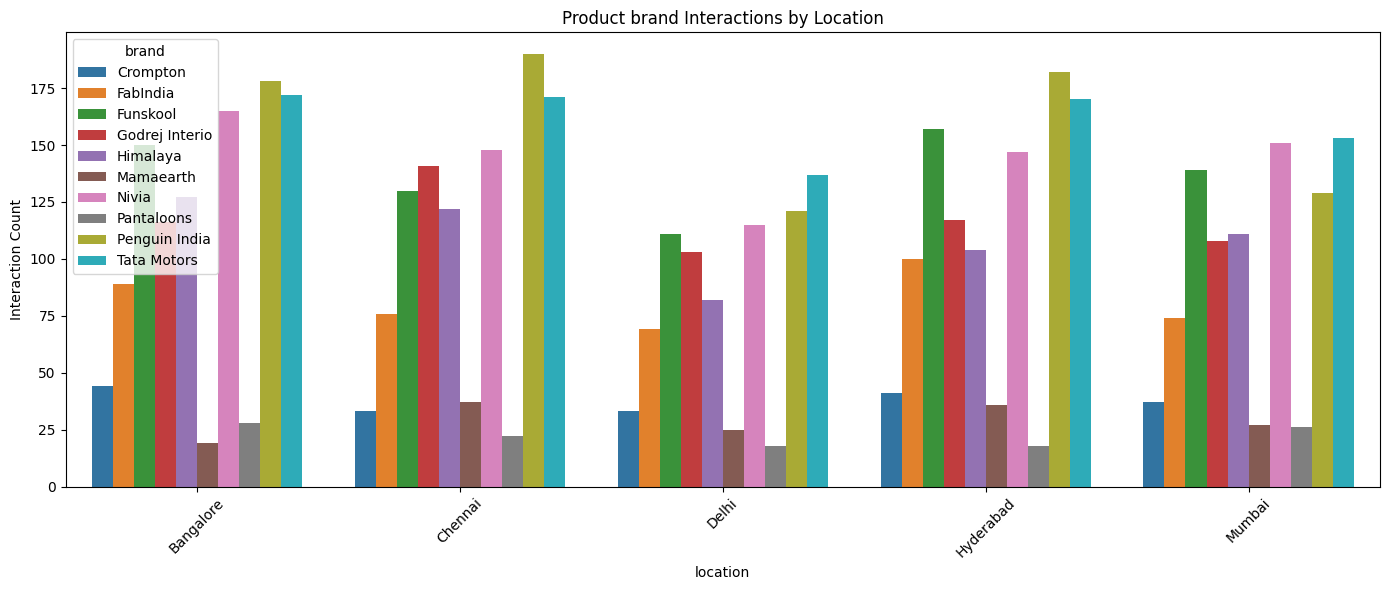

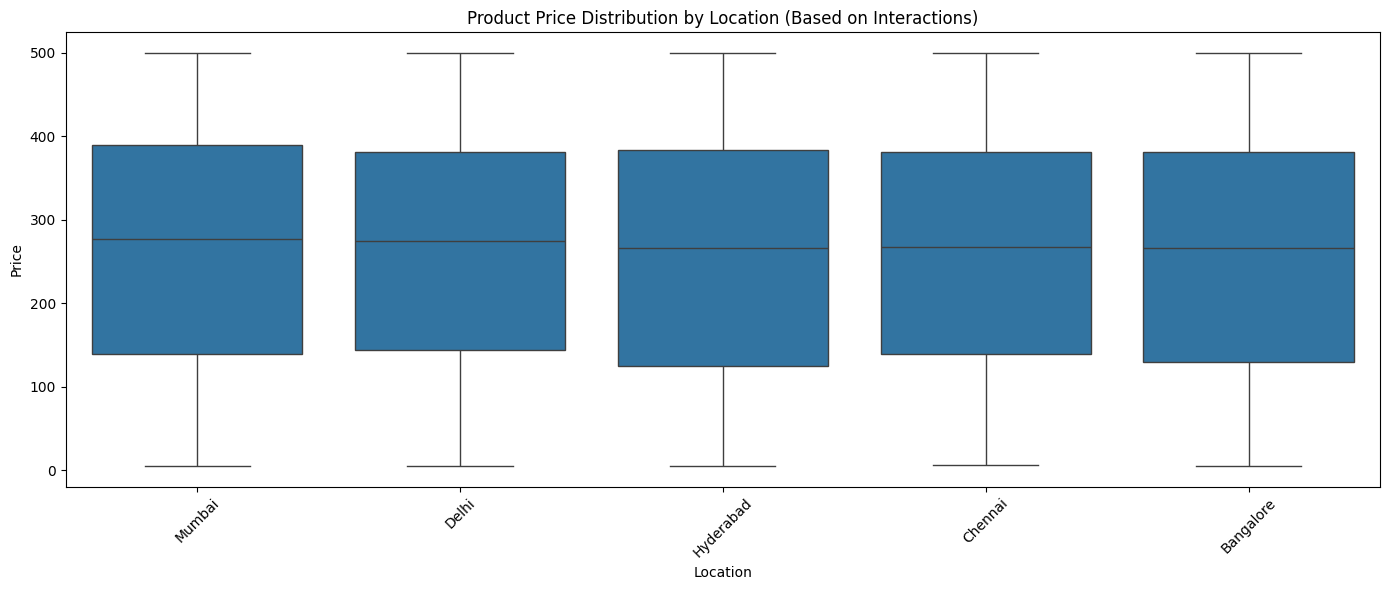

In [ ]:
# Merge interactions with products and users to get full user-product-location mapping
interactions['interaction_id'] = interactions.index
merged = interactions.merge(context, on='interaction_id', suffixes=('', '_context'))
merged = merged.merge(users, on='user_id', suffixes=('', '_user'))
merged = merged.merge(products, on='product_id')

# --- Category Preference by Location ---
category_location = merged.groupby(['location', 'category']).size().reset_index(name='count')
plt.figure(figsize=(14, 6))
sns.barplot(data=category_location, x='location', y='count', hue='category')
plt.title("Product Category Interactions by Location")
plt.ylabel("Interaction Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


brand_location = merged.groupby(['location', 'brand']).size().reset_index(name='count')
plt.figure(figsize=(14, 6))
sns.barplot(data=brand_location, x='location', y='count', hue='brand')
plt.title("Product brand Interactions by Location")
plt.ylabel("Interaction Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# --- Price Distribution by Location ---
plt.figure(figsize=(14, 6))
sns.boxplot(data=merged, x='location', y='price')
plt.title("Product Price Distribution by Location (Based on Interactions)")
plt.ylabel("Price")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
#print the distributions above without graphs
print(location_distribution)
print(category_location)
print(brand_location)
print(price_distribution)



interaction_type  add_to_cart  purchase      view
location                                         
Bangalore            0.294118  0.104779  0.601103
Chennai              0.294393  0.105607  0.600000
Delhi                0.289926  0.114251  0.595823
Hyderabad            0.304104  0.083022  0.612873
Mumbai               0.290052  0.095288  0.614660
     location        category  count
0   Bangalore          Beauty    146
1   Bangalore           Books    178
2   Bangalore        Clothing    117
3   Bangalore     Electronics    172
4   Bangalore  Home & Kitchen    160
5   Bangalore          Sports    165
6   Bangalore            Toys    150
7     Chennai          Beauty    159
8     Chennai           Books    190
9     Chennai        Clothing     98
10    Chennai     Electronics    171
11    Chennai  Home & Kitchen    174
12    Chennai          Sports    148
13    Chennai            Toys    130
14      Delhi          Beauty    107
15      Delhi           Books    121
16      Delhi        

NameError: name 'price_distribution' is not defined